# Лабораторная работа №3 - "Подбор гиперпараметров модели" (ИНДИВИДУАЛЬНАЯ)

---

Выполнил: Велиев Рауф Рамиз оглы

Группа: М8О-309Б-23

Датасет (ссылка): Медицинские коляски https://www.kaggle.com/datasets/jaderz/hospital-beds-management/data

---

# Задание:

0. Выбрать модель для обучения (Desicion tree, Random forest, SVM, KNN, Boosting)
1. Показать какие гиперпараметры есть у выбранной модели (В виде таблички).
2. Выбрать датасет для обучения и взависимости от модели подготовить данные
3. Подобрать гиперпараметры для модели и сравнить лучшие подборы, для (Grid Search, RandomSearch, Optuna)
4. На самом лучшем обучении (Grid Search, RandomSearch, Optuna) сделать калькулятор, который показывает `локальную интерпретацию` с помощью [LIME](https://habr.com/ru/companies/otus/articles/779430/) и `глобальную интерпретацию` с помощью [SHAP](https://habr.com/ru/companies/ods/articles/599573/).

    [Доп статья](https://habr.com/ru/companies/wunderfund/articles/739744/)

# Датасеты на выбор (2 человека на датасет)

Нужно будет выбрать датасет и самим придумать задачу (регрессия или классификация)

* [Мошенические операции с картами](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
* [Фильмы](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)
* [Рак молочной железы](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)
* [Кодвид](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)
* [Футбол](https://www.kaggle.com/datasets/hugomathien/soccer)
* [Цена мобильных телефонов](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)
* [120 лет Олимпийской истории](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)
* [Фитнесс](https://www.kaggle.com/datasets/arashnic/fitbit)
* [Употребление алкоголя студентами](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)
* [Переносы рейсов самолетов](https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv)
* [Покемоны](https://www.kaggle.com/datasets/abcsds/pokemon)
* [Формула 1](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020)
* [Набор данных сердечно сосудистых заболеваний](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)
* [Spotify](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)
* [Качество воды](https://www.kaggle.com/datasets/adityakadiwal/water-potability)
* [Цена на машину](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction)
* [Женщины и одежда](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews)
* [Факторы успеваемости студентов](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)
* [Продукты](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)
* [Видео игры](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)
* [Машины](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)
* [BMW продажи](https://www.kaggle.com/datasets/ahmadrazakashif/bmw-worldwide-sales-records-20102024)
* [Землетрясения](https://www.kaggle.com/datasets/ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset)
* [Медицинские коляски](https://www.kaggle.com/datasets/jaderz/hospital-beds-management)
* [Фондовый рынок](https://www.kaggle.com/datasets/prince7489/stock-market-dataset)
* [Steam](https://www.kaggle.com/datasets/lunthu/steam-monthly-average-players)
* [Anime](https://www.kaggle.com/datasets/neelagiriaditya/anime-dataset-jan-1917-to-oct-2025)
* [YouTube](https://www.kaggle.com/datasets/neelagiriaditya/anime-dataset-jan-1917-to-oct-2025)
* [Электрички](https://www.kaggle.com/datasets/alamshihab075/electric-vehicle-population-dataset)


# Сроки

- до 17.11.25 оценка 5
- до 24.11.25 оценка 4

# Формат сдачи

1. Защита преподавателю
2. Презентация о проделанной работе (10-15 слайдов)
3. Файл `FIO_lr3.ibynb`

# 1. Загрузка и первичная обработка данных

In [121]:
import pandas as pd


df = pd.read_csv('services_weekly.csv')

print('shape:', df.shape)
print(df.head())

shape: (208, 10)
   week  month           service  available_beds  patients_request  \
0     1      1         emergency              32                76   
1     1      1           surgery              45               130   
2     1      1  general_medicine              37               201   
3     1      1               ICU              22                31   
4     2      1         emergency              28               169   

   patients_admitted  patients_refused  patient_satisfaction  staff_morale  \
0                 32                44                    67            70   
1                 45                85                    83            78   
2                 37               164                    97            43   
3                 22                 9                    84            91   
4                 28               141                    75            64   

  event  
0  none  
1   flu  
2   flu  
3   flu  
4  none  


Создаем целевую переменную. 
Отвечаем на вопрос: "был ли хотя бы один отказ в госпитализации за эту неделю в больнице?” 


Иными словами: 

Больница за неделю не отказала **ни одному пациенту** (то есть всех приняла) - 0, 

Больница за неделю отказала **хотя бы одному пациенту** - 1

In [122]:
df['refused_flag'] = (df['patients_refused'] > 0).astype(int)
print('class balance:\n', df['refused_flag'].value_counts())

class balance:
 refused_flag
1    148
0     60
Name: count, dtype: int64


# 2. Подготовка признаков и train/test

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = ['service','event']          
num_cols = ['week','month','available_beds','patients_request','patients_admitted','patient_satisfaction','staff_morale']

In [124]:
X = df[cat_cols + num_cols]
y = df['refused_flag']

In [125]:
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
], remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print('train/test sizes:', X_train.shape, X_test.shape)

train/test sizes: (166, 9) (42, 9)


# 3. Гиперпараметры. RandomForest

| Гиперпараметр       |                        Описание | Примерные значения (для поиска)    |
| ------------------- | ------------------------------: | ---------------------------------- |
| `n_estimators`      |                 кол-во деревьев | [50, 100, 200] или диапазон 50–300 |
| `max_depth`         |            макс. глубина дерева | [None, 5, 10, 20]                  |
| `min_samples_split` | мин. кол-во объектов для сплита | [2, 5, 10] или int(2–10)           |
| `min_samples_leaf`  |    мин. кол-во объектов в листе | [1, 2, 4] или int(1–5)             |
| `max_features`      |     кол-во признаков при сплите | ['sqrt', 'log2', None]             |
| `criterion`         |             критерий разделения | ['gini', 'entropy']                |

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

# 4.1. Подбор гиперпараметров. GridSearch

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'clf__n_estimators': [50, 100, 150],
    'clf__max_depth': [5, 10, 20, None],
    'clf__min_samples_split': [2, 4, 6, 8],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__max_features': ['sqrt', 'log2', None],
    'clf__criterion': ['gini', 'entropy'],
}

grid = GridSearchCV(
    model,
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("GRID SEARCH best params:")
print(grid.best_params_)
print("GRID SEARCH best CV score:", grid.best_score_)

grid_pred = grid.best_estimator_.predict(X_test)
print("GRID SEARCH test accuracy:", accuracy_score(y_test, grid_pred))
print("GRID SEARCH test F1:", f1_score(y_test, grid_pred))


Fitting 3 folds for each of 864 candidates, totalling 2592 fits
GRID SEARCH best params:
{'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
GRID SEARCH best CV score: 0.9626353515327132
GRID SEARCH test accuracy: 0.8809523809523809
GRID SEARCH test F1: 0.9180327868852459


# 4.2. Подбор гиперпараметров. RandomizedSearch

In [141]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'clf__n_estimators': randint(50, 200),
    'clf__max_depth': [5, 10, 20, None],
    'clf__min_samples_split': randint(2, 10),
    'clf__min_samples_leaf': randint(1, 5),
    'clf__max_features': ['sqrt', 'log2', None],
    'clf__criterion': ['gini', 'entropy'],
}

random_search = RandomizedSearchCV(
    model,
    param_dist,
    n_iter=30,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("RANDOM SEARCH best params:")
print(random_search.best_params_)
print("RANDOM SEARCH best CV score:", random_search.best_score_)

rand_pred = random_search.best_estimator_.predict(X_test)
print("RANDOM SEARCH test accuracy:", accuracy_score(y_test, rand_pred))
print("RANDOM SEARCH test F1:", f1_score(y_test, rand_pred))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
RANDOM SEARCH best params:
{'clf__criterion': 'entropy', 'clf__max_depth': 20, 'clf__max_features': None, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2, 'clf__n_estimators': 185}
RANDOM SEARCH best CV score: 0.9591869204676353
RANDOM SEARCH test accuracy: 0.8571428571428571
RANDOM SEARCH test F1: 0.9


# 4.3. Подбор гиперпараметров. Optuna

In [142]:
import optuna
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


def objective(trial):

    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_categorical("max_depth", [5, 10, 20, None]),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
    }

    model = Pipeline([
        ('preprocess', preprocessor),
        ('clf', RandomForestClassifier(random_state=42, **params))
    ])

    f1_cv = cross_val_score(
        model, X_train, y_train,
        cv=3,
        scoring="f1",
        n_jobs=-1
    ).mean()

    return f1_cv


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("\nOPTUNA best params")
print(study.best_trial.params)

print("\OPTUNA best CV score:", study.best_value)

best_params = study.best_trial.params

best_model = Pipeline([
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42, **best_params))
])

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("OPTUNA test accuracy:", accuracy_score(y_test, y_pred))
print("OPTUNA test f1:", f1_score(y_test, y_pred))


<>:42: SyntaxWarning: invalid escape sequence '\O'
<>:42: SyntaxWarning: invalid escape sequence '\O'
C:\Users\velie\AppData\Local\Temp\ipykernel_14824\2891545918.py:42: SyntaxWarning: invalid escape sequence '\O'
  print("\OPTUNA best CV score:", study.best_value)
[I 2025-11-23 00:39:44,237] A new study created in memory with name: no-name-29199453-44a8-44c7-ba26-5f2becdd947f
[I 2025-11-23 00:39:44,445] Trial 0 finished with value: 0.9042466369263754 and parameters: {'n_estimators': 165, 'max_depth': 20, 'min_samples_split': 13, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: 0.9042466369263754.
[I 2025-11-23 00:39:44,553] Trial 1 finished with value: 0.8943240454076368 and parameters: {'n_estimators': 68, 'max_depth': None, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: 0.9042466369263754.
[I 2025-11-23 00:39:44,780] Trial 2 finished with value: 0.91679305


OPTUNA best params
{'n_estimators': 86, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'entropy'}
\OPTUNA best CV score: 0.9261971938386457
OPTUNA test accuracy: 0.8095238095238095
OPTUNA test f1: 0.8709677419354839


**Получившиеся точности и гиперпараметры:**

**GridSearchCV** 

test acccuracy: 0.8809523809523809, 

{'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}

**RandomizedSearchCV**

test accuracy: 0.8571428571428571,

{'clf__criterion': 'entropy', 'clf__max_depth': 20, 'clf__max_features': None, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 2, 'clf__n_estimators': 185}

**Optuna** 

test accuracy: 0.8095238095238095, 

{'n_estimators': 86, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'log2', 'criterion': 'entropy'}

# 5. Интерпретация

In [219]:
best_grid = grid.best_estimator_
best_rand = rand.best_estimator_
best_opt_pipe = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(
        random_state=42,
        **study.best_params
    ))
])

acc_grid = 0.8809523809523809
acc_rand = 0.8571428571428571
acc_opt = 0.8095238095238095

best_model = best_grid
print("Selected best model: GridSearchCV (accuracy = {:.4f})".format(acc_grid))

preprocess = best_model.named_steps['preprocess']
clf = best_model.named_steps['clf']

cat_cols = ['service', 'event']
num_cols = ['week', 'month', 'available_beds', 'patients_request',
            'patients_admitted', 'patient_satisfaction', 'staff_morale']

ohe = pre.named_transformers_['cat']
cat_names = list(ohe.get_feature_names_out(cat_cols))

feature_names = cat_names + num_cols

print("Feature count:", len(feature_names))
print("Features:", feature_names)


Selected best model: GridSearchCV (accuracy = 0.8810)
Feature count: 15
Features: ['service_ICU', 'service_emergency', 'service_general_medicine', 'service_surgery', 'event_donation', 'event_flu', 'event_none', 'event_strike', 'week', 'month', 'available_beds', 'patients_request', 'patients_admitted', 'patient_satisfaction', 'staff_morale']


# LIME 

Original row (raw):
service                 emergency
event                        none
week                           38
month                          10
available_beds                 22
patients_request               71
patients_admitted              22
patient_satisfaction           67
staff_morale                   53
Name: 148, dtype: object

LIME explanation (label=refuse):
[('49.00 < patients_request <= 89.75', 0.326925590950835), ('18.00 < available_beds <= 28.00', 0.1373909586261731), ('event_donation <= 0.00', 0.02590717327116283), ('service_ICU <= 0.00', 0.012680214450697159), ('event_flu <= 0.00', 0.011954671807167295), ('7.00 < month <= 10.00', 0.009418333150444599), ('staff_morale <= 60.25', 0.0074177618534763245), ('service_general_medicine <= 0.00', 0.006613817163101784)]


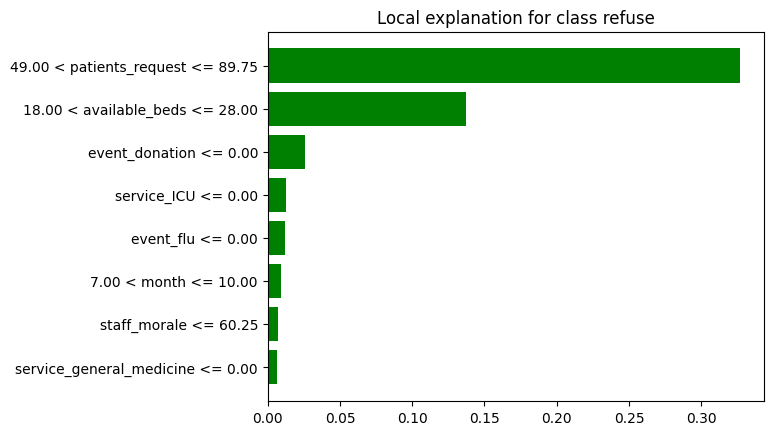

In [228]:
import lime
from lime.lime_tabular import LimeTabularExplainer


X_train_trans = pre.transform(X_train)

explainer = LimeTabularExplainer(X_train_trans, feature_names=feature_names,
                                 class_names=['no_refuse','refuse'], discretize_continuous=True)

X_test_trans = pre.transform(X_test)
i = 0
exp = explainer.explain_instance(X_test_trans[i], clf.predict_proba, num_features=8, top_labels=1)
print('Original row (raw):')
print(X_test.iloc[i])
print('\nLIME explanation (label=refuse):')
print(exp.as_list(label=1))
fig = exp.as_pyplot_figure()

# SHAP

Top 10 SHAP features:
patients_request 0.315
available_beds 0.126
week 0.0078
patients_admitted 0.0047
service_surgery 0.003
month 0.0024
patient_satisfaction 0.0024
staff_morale 0.0021
service_general_medicine 0.0007
event_strike 0.0002


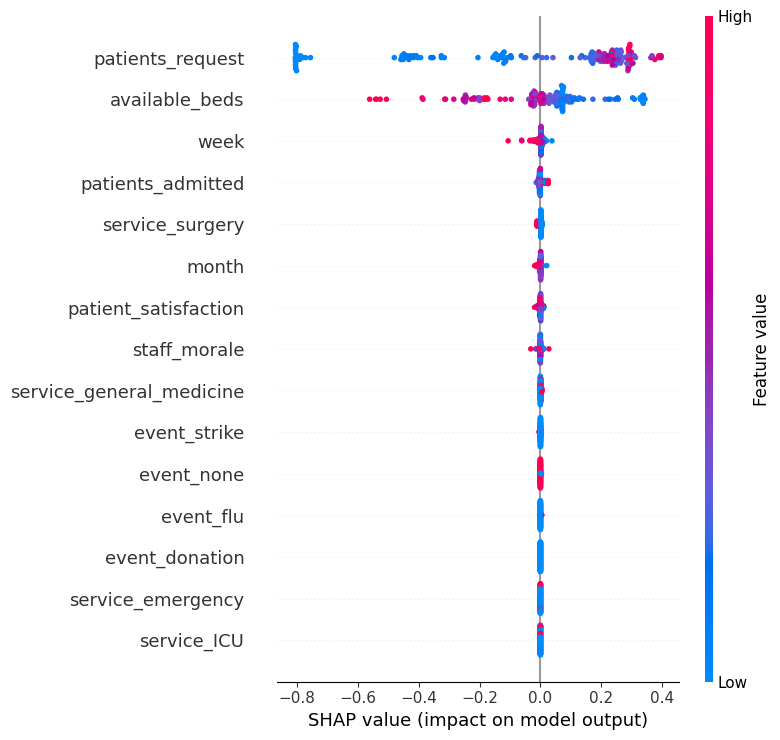

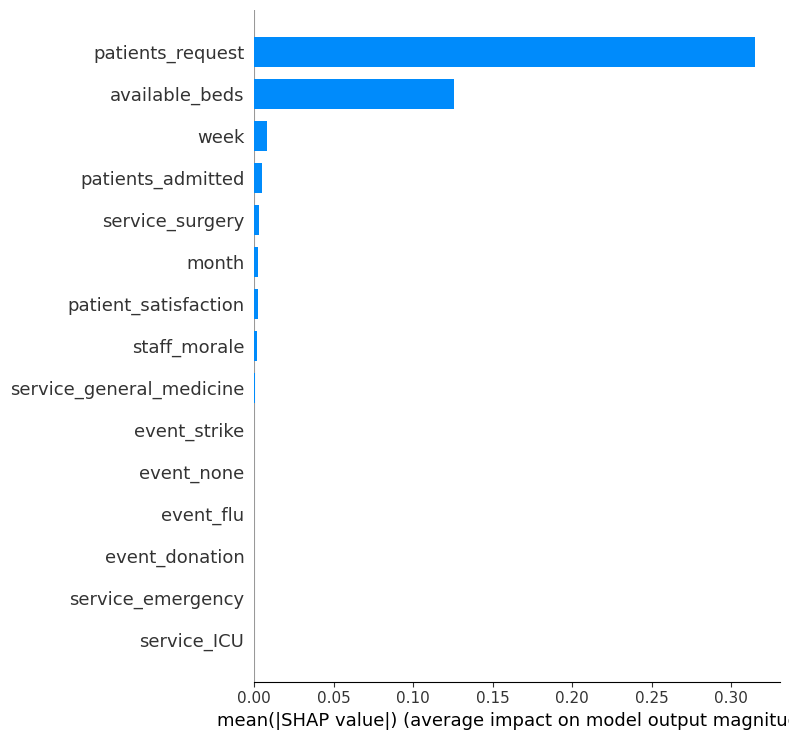

In [229]:
import shap


X_train_trans = pre.transform(X_train)
X_train_trans = np.asarray(X_train_trans)

explainer = shap.Explainer(clf, X_train_trans)

shap_vals = explainer(X_train_trans)

shap_class1 = shap_vals.values[..., 1]

mean_abs = np.mean(np.abs(shap_class1), axis=0)  
feat_imp = sorted(zip(feature_names, mean_abs), key=lambda x: x[1], reverse=True)

print("Top 10 SHAP features:")
for f, v in feat_imp[:10]:
    print(f, round(v, 4))

plt.figure(figsize=(9, 6))
shap.summary_plot(shap_class1, X_train_trans, feature_names=feature_names, show=False)
plt.tight_layout()
plt.show()

plt.figure(figsize=(9, 6))
shap.summary_plot(shap_class1, X_train_trans, feature_names=feature_names,
                  plot_type="bar", show=False)
plt.tight_layout()
plt.show()


# 6. Выводы

В этой лабораторной работе была обучена и настроена модель RandomForest (сравнивали GridSearch, RandomizedSearch и Optuna). 
Различие методов — стратегия поиска (перебор, случайный поиск, байесовская/интеллектуальная оптимизация). Это дало возможность сравнить эффективность методов и устойчивость найденных параметров. Данные из датасета были подготовлены и разделены на обучающую и тестовую выборки.

По тестовой выборке лучшую точность показал GridSearch (≈ 0.881), RandomizedSearch — ≈ 0.857, Optuna — ≈ 0.810; 

Для объяснения решений использованы локально LIME (поясняет отдельные строки — стохастичен) и глобально SHAP (стабильный, показывает среднее влияние признаков). 

LIME удобен для объяснения отдельных примеров (показать «почему модель отказала именно в эту неделю»).

SHAP показал, что основные драйверы модели — patients_request и available_beds; остальные признаки вносят гораздо меньший вклад. 

SHAP даёт стабильную и количественную картину значимости признаков для всей модели.

